In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("student_performance.csv")

print(df.shape)
df.head()


(1000000, 6)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [5]:
df = df.dropna()
df.isna().sum()


,0
student_id,0
weekly_self_study_hours,0
attendance_percentage,0
class_participation,0
total_score,0
grade,0


In [8]:
target_column = "total_score"   # ← CHANGE THIS if needed

X = df.drop(columns=[target_column])
y = df[target_column]


In [9]:
X = pd.get_dummies(X, drop_first=True)
X.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,grade_B,grade_C,grade_D,grade_F
0,1,18.5,95.6,3.8,False,False,False,False
1,2,14.0,80.0,2.5,True,False,False,False
2,3,19.5,86.3,5.3,False,False,False,False
3,4,25.7,70.2,7.0,False,False,False,False
4,5,13.4,81.9,6.9,False,False,False,False


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [13]:
y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results:")
print("MSE:", mse)
print("R² Score:", r2)


Lasso Regression Results:
MSE: 16.30701222626313
R² Score: 0.9315046143921797


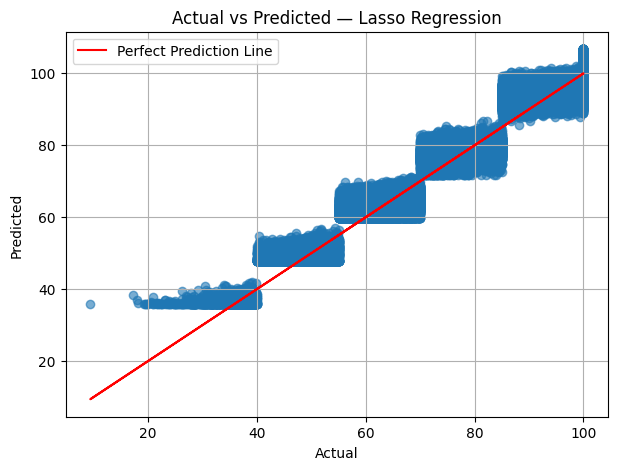

In [16]:
plt.figure(figsize=(7,5))
plt.plot(y_test, y_test, label="Perfect Prediction Line", color='red')
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted — Lasso Regression")
plt.legend()
plt.grid()
plt.show()


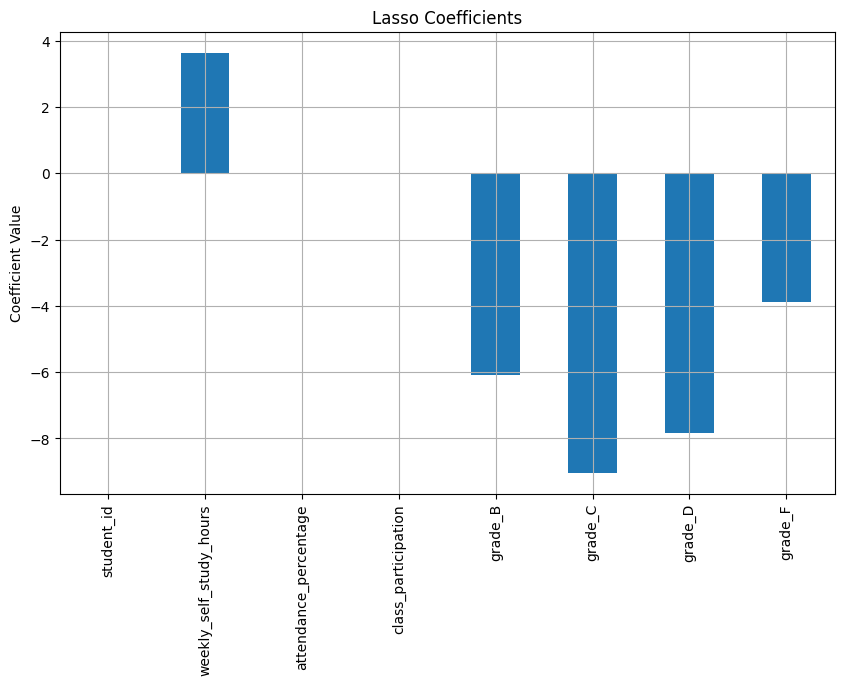

In [17]:
coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10,6))
coef.plot(kind='bar')
plt.title("Lasso Coefficients")
plt.ylabel("Coefficient Value")
plt.grid()
plt.show()


In [18]:
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 2, 100),
    cv=5,
    random_state=42
)
lasso_cv.fit(X_train_scaled, y_train)

print("Best Alpha:", lasso_cv.alpha_)


Best Alpha: 0.001873817422860383


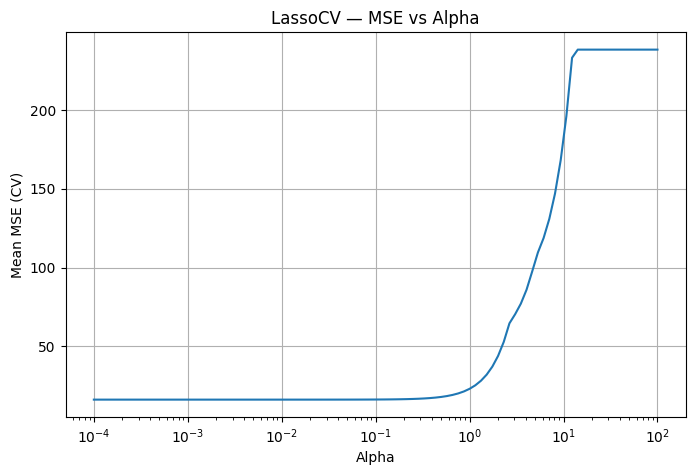

In [19]:
plt.figure(figsize=(8,5))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1))
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Mean MSE (CV)")
plt.title("LassoCV — MSE vs Alpha")
plt.grid()
plt.show()


In [20]:
best_lasso = Lasso(alpha=lasso_cv.alpha_)
best_lasso.fit(X_train_scaled, y_train)

y_pred_best = best_lasso.predict(X_test_scaled)

print("Final MSE:", mean_squared_error(y_test, y_pred_best))
print("Final R²:", r2_score(y_test, y_pred_best))


Final MSE: 16.229968227050048
Final R²: 0.9318282272258275
